<a id="back_to_top"></a>
# Employee Churn Rate Analysis and Prediction from Human Resource Data
by Carloz Gil

*The Notebook contains links that don't operate on Github. It is recommended to view the project below:*<br>
https://nbviewer.org/github/clozgil/Employee-Churn-Rate-Analysis-and-Prediction/blob/main/Employee%20Churn%20Rate%20Analysis%20and%20Prediction.ipynb

## Table of Contents
- [Introduction](#intro)
    - [Data Source](#source)
    - [Disclaimer](#disclaim)
- [Data Preparation](#prep)
- [Exploratory Data Analysis](#eda)
    - [Overview](#eda)
    - [Visualization](#viz)
        - [Age](#viz)
        - [Discrete Variables](#disc)
        - [Continuous Variables](#cont)
- [Data Cleaning and Preprocessing](#clean)
    - [Categorical Variables](#cat)
    - [Numerical Variables](#num)
    - [Concat dfs, Scaling, and Dependent Variable](#concat)
- [Data Analysis](#analysis)
    - [Logistic Regression](#log)
        - [Logistic Regression Evaluation](#log_eval)
    - [Random Forest](#forest)
        - [Random Forest Evaluation](#forest_eval)
    - [Artificial Neural Network](#deep)
        - [Artificial Neural Network Evaluation](#deep_eval)

<a id="intro"></a>
# Introduction

This project focuses on analyzing human resource data on employees and building a model that can predict which employees are more likely to quit. Hiring and retaining workers can be a costly task for any business. By focusing on an accurate model that can predict an employee's retention, we could reduce an organization's employee churn rate and potentially save the organization time and capital. 

For this project, we will briefly manipulate data using pandas, perform exploratory data analysis using matplolib and seaborn, and build a few classification models such as Logistic Regression and Random Forest, and one deep learning model, Artificial Neural Networks, using tensorflow.

<a id="source"></a>
## Data Source

We will be using IBM's HR Analytics Employee Attrition & Performanced dataset for this project. It can be obtained from Kaggle in the link below. <br>

https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset

This is a fictional data set created by IBM data scientists. I hesitate to use data from Kaggle since it's often very clean and ready. We miss the opportunity to gather data and practice data manipulations. Still, for the purpose of this project, good insights can be drawn from this data set. I do have an entire project on data collection and manipulation below. <br>

https://nbviewer.org/github/clozgil/Mergers-Acquisition-Stock-Price-Prediction/blob/main/Mergers%20%26%20Acquisition%20-%20Stock%20Price%20Prediction.ipynb

<a id="disclaim"></a>
## Disclaimer

Credit goes to Dr. Ryan Ahmed from McMaster University in Canada who is doing some great work using data science to solve business problems. My project is simply my interpretation on some of the research and work that he has done.

## Observations

As the notebook progresses, there are sections were I note an observation. Those will be shown as
        
        **Observation**
        

[Back to the top](#back_to_top)

<a id="prep"></a>
# Data Preparation

Importing libraries, loading the dataset, and getting a general idea of the dataset

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = None
pd.options.mode.chained_assignment = None

%matplotlib inline

In [62]:
hr_df = pd.read_csv('Human_Resources.csv')
hr_df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [63]:
hr_df.shape

(1470, 35)

    *Observation*
    
Right from the start we can begin inferring which variables might be relevant. For example, age might play a role. Older employees might not be willing to leave so easily given that they have a mortgage, family, etc

In [64]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [65]:
hr_df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


<AxesSubplot:>

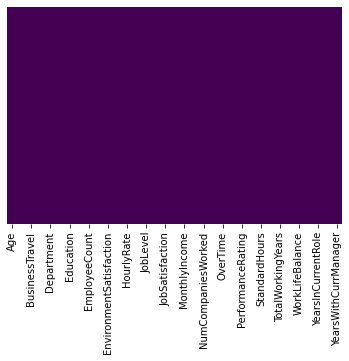

In [66]:
#missing data
sns.heatmap(hr_df.isnull(), cmap = 'viridis', yticklabels=False, cbar = False)

As noted above, the dataset appears to be fairly complete and consistent. Only a couple of notable changes are needed.
- Attribtion (meaning whether or not an employee leaves) is currently an objective, but should really be a numeric value.
- OverTime, a potentially crucial variable in determining if an employee leaves, should also be numeric

We'll address these immediately

In [67]:
cols = ['Attrition', 'OverTime']

for col in cols:
    hr_df[col] = hr_df[col].apply(lambda x : 1 if x == 'Yes' else 0)

The attribute "Over18" seems concerning. I'd like to see how many are over 18, hopefully it is most if not all the employees

In [68]:
hr_df['Over18'] = hr_df['Over18'].apply(lambda x : 1 if x == 'Y' else 0) #convert to numeric
hr_df['Over18'].value_counts()

1    1470
Name: Over18, dtype: int64

[Back to the top](#back_to_top)

<a id="eda"></a>
# Exploratory Data Analysis

## Overview

In this section of the project, we will focus on exploring the dataset with some visualizations, and see if we can begin removing any useless column.

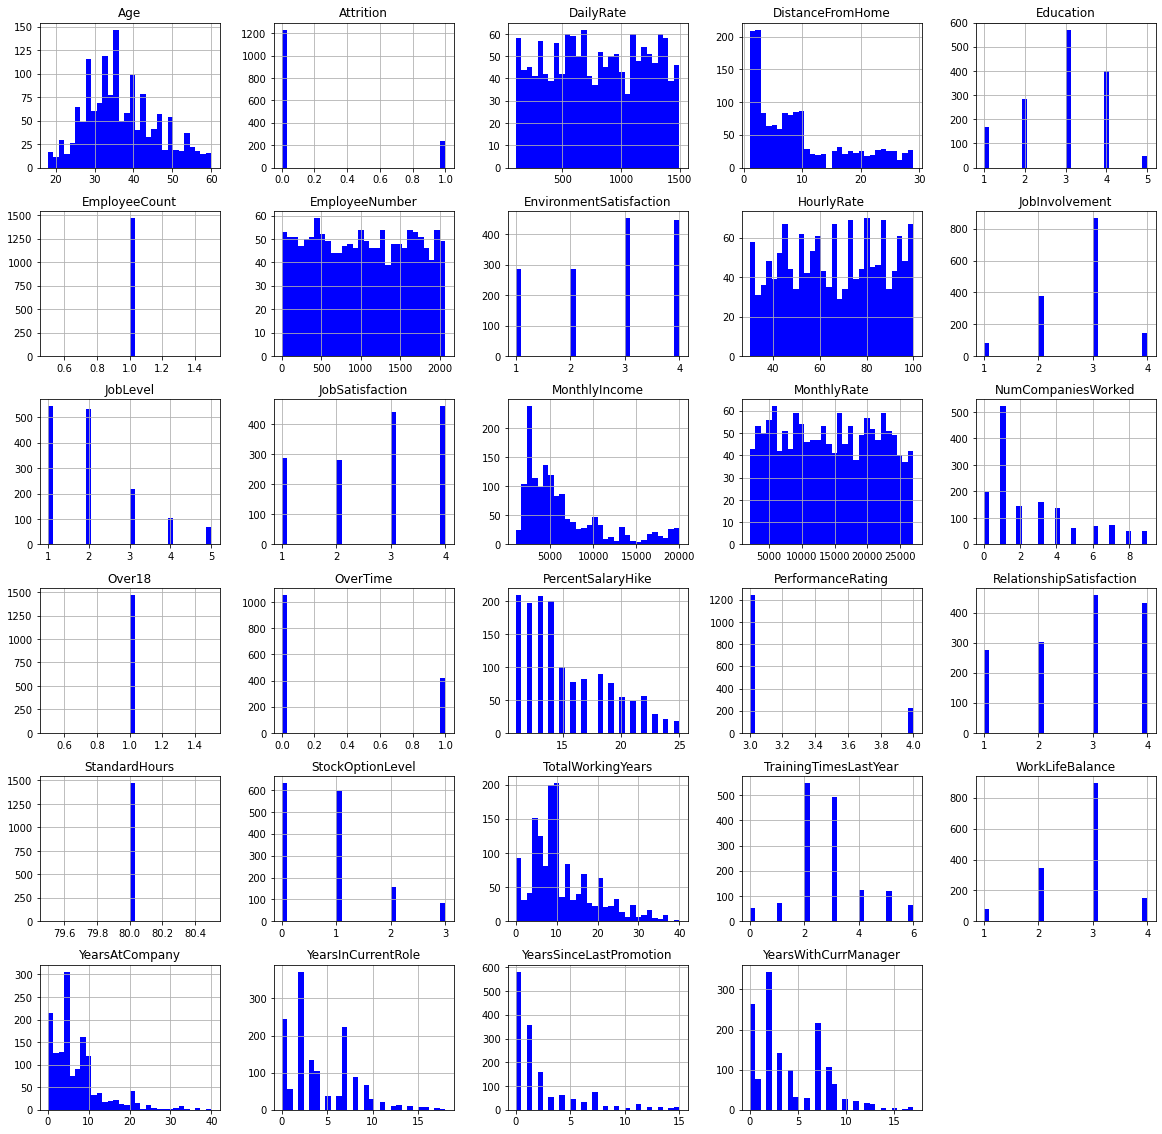

In [69]:
hr_df.hist(figsize = (20,20), bins = 30, color = 'blue')
plt.show()

The above visualization shows that there are a few columns we can begin getting rid of.
- Employee count (1 value. Not very helpful)
- Employeenumber (Not very useful in determining if an employee stays or goes)
- Over18 (they are all over18, so also not very helpful)
- Standard hours (Only 80)

In [70]:
#Drop the 4 columns we noticed that are not helpful

cols = ['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours']
hr_df.drop(cols, axis = 1, inplace = True)

Let's split the df into two groups, stayed and left, and observe the percentage of each

In [71]:
#Split the df into two
left = hr_df[hr_df.Attrition == 1]
stayed = hr_df[hr_df.Attrition == 0]

#Total num of employees
print('Total number of employees is ', len(hr_df))

print('\n')

#Employees that left
print('Total number of employees that left is ', len(left))
print('That is ', round(len(left) / len(hr_df) *100, 1), '%')

print('\n')

#Employees the stayed
print('Total number of employees that stayed is ', len(stayed))
print('That is ', round(len(stayed) / len(hr_df) *100, 1), '%')

Total number of employees is  1470


Total number of employees that left is  237
That is  16.1 %


Total number of employees that stayed is  1233
That is  83.9 %


Let's have a closer look at the charactersistics of both groups

In [72]:
left.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,1.0,750.362869,10.632911,2.839662,2.464135,65.573840,2.518987,1.637131,2.468354,4787.092827,14559.308017,2.940928,0.535865,15.097046,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321
std,9.689350,0.0,401.899519,8.452525,1.008244,1.169791,20.099958,0.773405,0.940594,1.118058,3640.210367,7208.153264,2.678519,0.499768,3.770294,0.363735,1.125437,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349
min,18.000000,1.0,103.000000,1.000000,1.000000,1.000000,31.000000,1.000000,1.000000,1.000000,1009.000000,2326.000000,0.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.0,408.000000,3.000000,2.000000,1.000000,50.000000,2.000000,1.000000,1.000000,2373.000000,8870.000000,1.000000,0.000000,12.000000,3.000000,2.000000,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,32.000000,1.0,699.000000,9.000000,3.000000,3.000000,66.000000,3.000000,1.000000,3.000000,3202.000000,14618.000000,1.000000,1.000000,14.000000,3.000000,3.000000,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,39.000000,1.0,1092.000000,17.000000,4.000000,4.000000,84.000000,3.000000,2.000000,3.000000,5916.000000,21081.000000,5.000000,1.000000,17.000000,3.000000,4.000000,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000
max,58.000000,1.0,1496.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19859.000000,26999.000000,9.000000,1.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000


In [73]:
stayed.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.00000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,37.561233,0.0,812.504461,8.915653,2.927007,2.771290,65.952149,2.770479,2.145985,2.778589,6832.739659,14265.779400,2.64558,0.234388,15.231144,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
std,8.888360,0.0,403.208379,8.012633,1.027002,1.071132,20.380754,0.692050,1.117933,1.093277,4818.208001,7102.260749,2.46009,0.423787,3.639511,0.360408,1.071603,0.841985,7.760719,1.293585,0.681907,6.096298,3.649402,3.234762,3.594116
min,18.000000,0.0,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1051.000000,2094.000000,0.00000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.0,477.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,3211.000000,7973.000000,1.00000,0.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.0,817.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,5204.000000,14120.000000,2.00000,0.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000
75%,43.000000,0.0,1176.000000,13.000000,4.000000,4.000000,83.000000,3.000000,3.000000,4.000000,8834.000000,20364.000000,4.00000,0.000000,18.000000,3.000000,4.000000,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,0.0,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26997.000000,9.00000,1.000000,25.000000,4.000000,4.000000,3.000000,38.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


    *Observation*
    
People who left lived farther away on average, although not by much. As expected, people who made less on average also left, but job satisfaction was not as different as expected. Overtime is another variable appears to have been influential to people leaving.

Let's look at a correlation to see these variable at play

<AxesSubplot:>

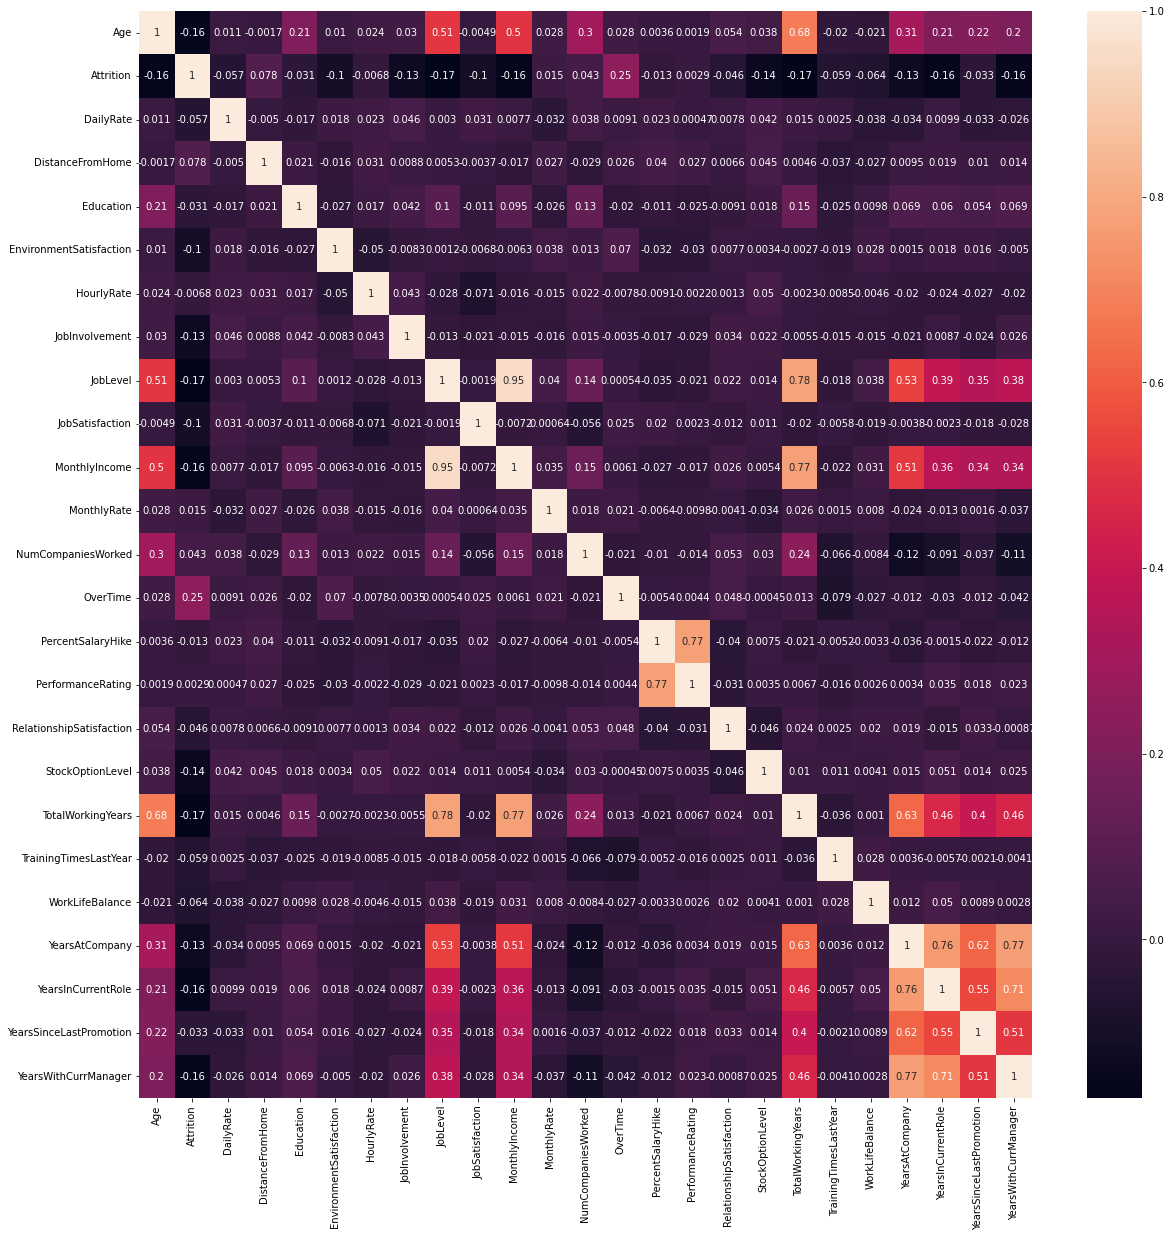

In [74]:
f, ax = plt.subplots(figsize = (20,20))
sns.heatmap(hr_df.corr(), annot = True)

Some of these appear to make sense.
- Total working years and job level
- Total working years and monthly income
- Performance rating and percent salary hike (people that are efficient do see compensention, but is it causing overtime and burnout?)
- Years with current manager and years at company (hierarchy of managers and employees might be working for this organization, which is a good thing. Perhaps focusing on good people for managers might retain employees)

[Back to the top](#back_to_top)

<a id="viz"></a>
## Visualization

Thus far, we've made a couple of observation based on numbers and correlations. This section of the project will focus on visualizing those variables with special attention to those individuals who stayed and those who left

### Age

<AxesSubplot:xlabel='Age', ylabel='count'>

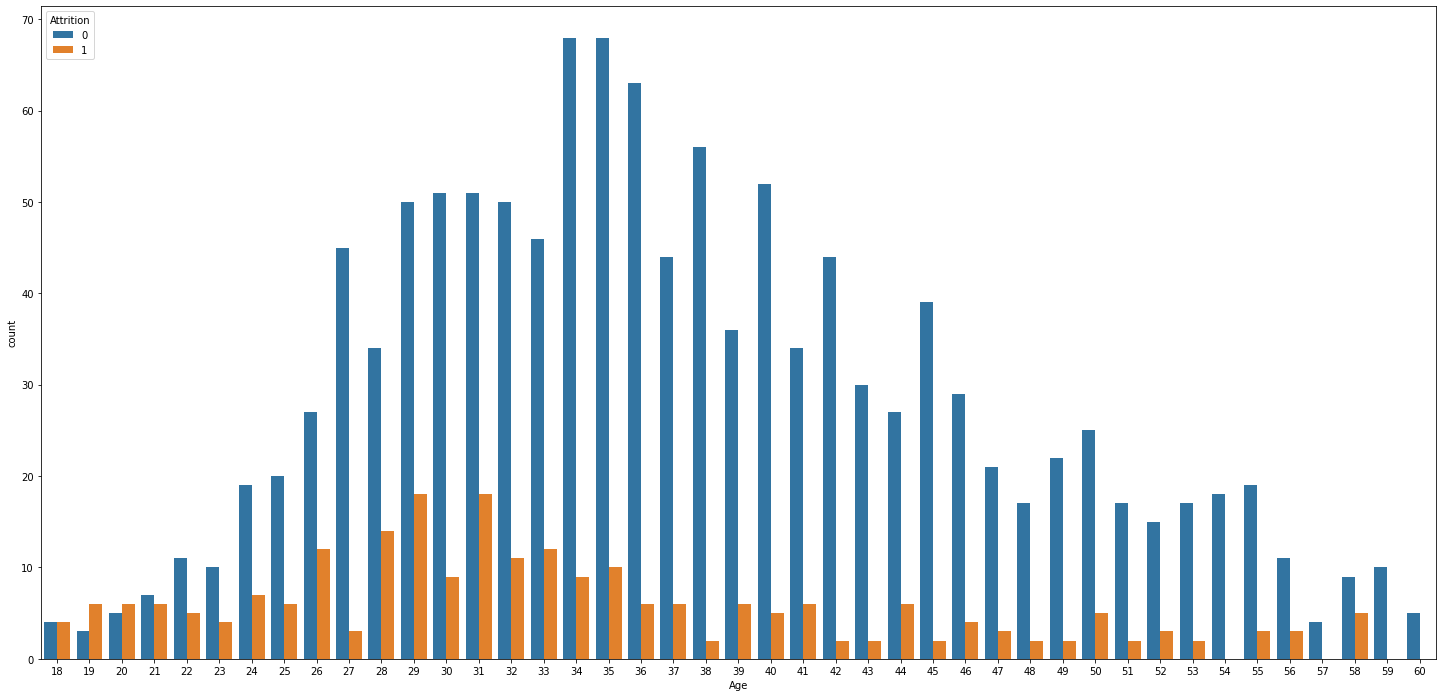

In [75]:
plt.figure(figsize = (25,12))
sns.countplot(x = hr_df['Age'], hue = 'Attrition', data = hr_df)

    *Observation*
    
For those who stayed, the age distribution appears almost normal around the 28 - 42 age range with a majority around 34 and 35 years. The distribution of those who left is not as normal, but a majority appear to be around the 28 - 33 range. For those who are 29 and 31 years of age, we had around 50 employees who stayed and almost 20 who left. That is almost 30% of the employees who left, which is very alarming.

Employees who are 18 - 21, were equally likely to leave or stay. In some cases (age 19) the people who left were more than the people who stayed. In a similar way, people who were 54 all stayed. It does appear that age is a significant factor

<a id="disc"></a>
### Discrete Variables

One interesting idea is to visualize discrete and continuous variables.

<AxesSubplot:xlabel='JobInvolvement', ylabel='count'>

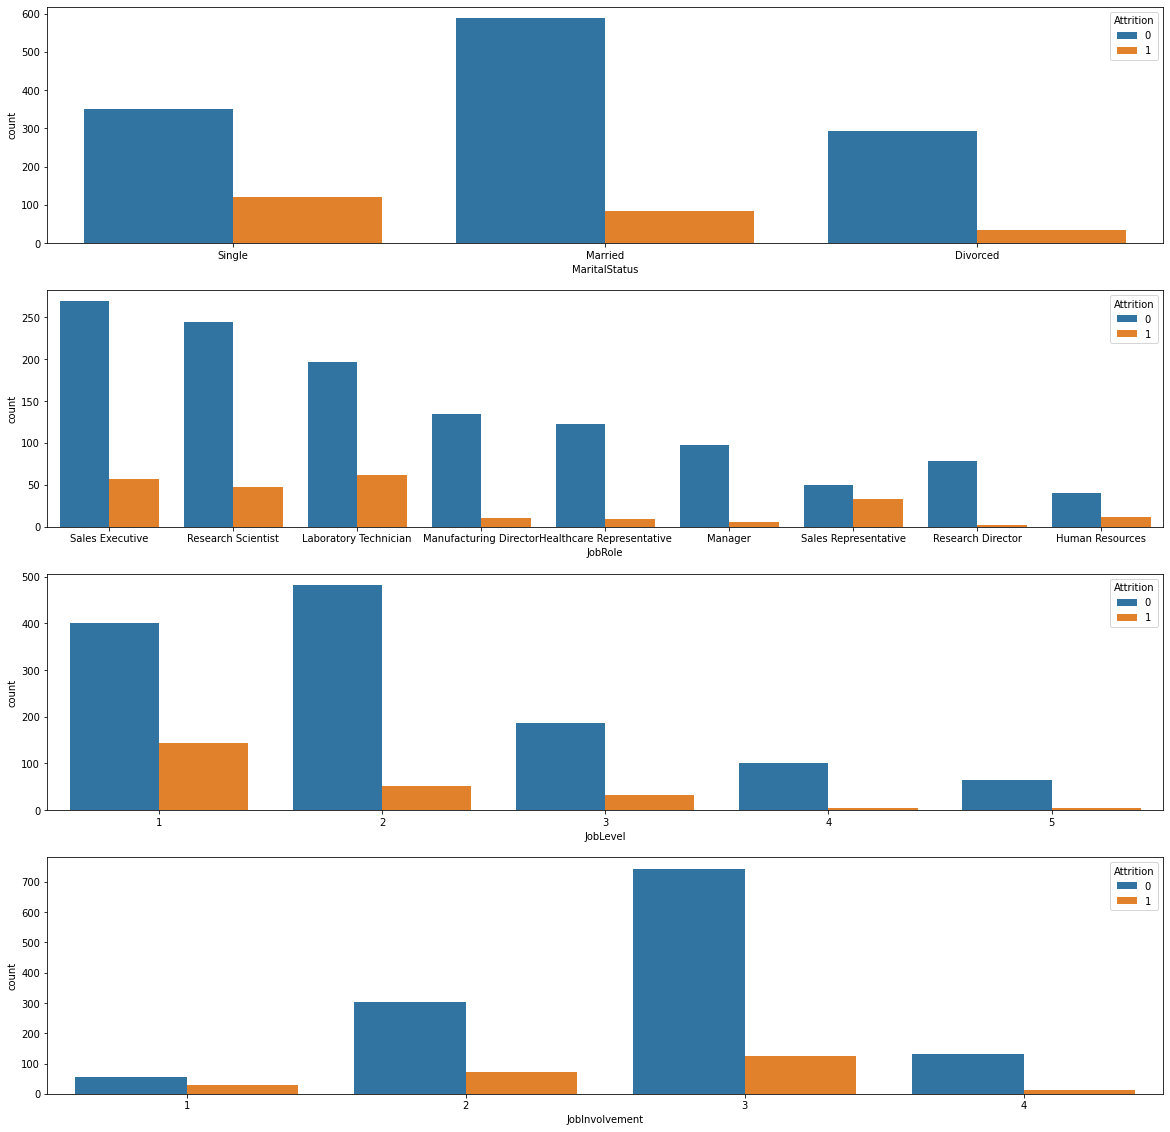

In [76]:
plt.figure(figsize = (20,20))

plt.subplot(411)
sns.countplot(x = 'MaritalStatus', hue = 'Attrition', data = hr_df)

plt.subplot(412)
sns.countplot(x = 'JobRole', hue = 'Attrition', data = hr_df)

plt.subplot(413)
sns.countplot(x = 'JobLevel', hue = 'Attrition', data = hr_df)

plt.subplot(414)
sns.countplot(x = 'JobInvolvement', hue = 'Attrition', data = hr_df)

    **Observation**

**Marital Status**<br>
As expected, single individuals are more likely to leave. In this case, 30% of individuals stayed

**Job Role**<br>
Here are the most concerning issues. The sales representative team had approximately 90 employees from which 45 or so left. Lab technicians also have a high turn around. These are very concerning percentages. 

The opposite is true for Research director who had 75 employees and saw almost no turnover.

**Job Level/Involvement**<br>
Likewise, job level as well as job involvement had notable problems. Although a lower job level or a lower job involvement seem like logical reasons for having employees leave.  

[Back to the top](#back_to_top)

<a id="cont"></a>
### Continuous Variables

We'll plot some kde graphs for the continuous variables. We'll focus on observing the following:
- Distance from Home
- Years with Current Manager
- Total Working Years
- Job Role v. Monthly Income
- Gender v. Monthly Income

#### Distance from Home

Distance from home is another logical attribute for why someone might want to leave. We also did note above that this was a differentiating factor. We'll plot somethe distance from home for those people who left and stayed

Text(0.5, 0, 'Distance from home')

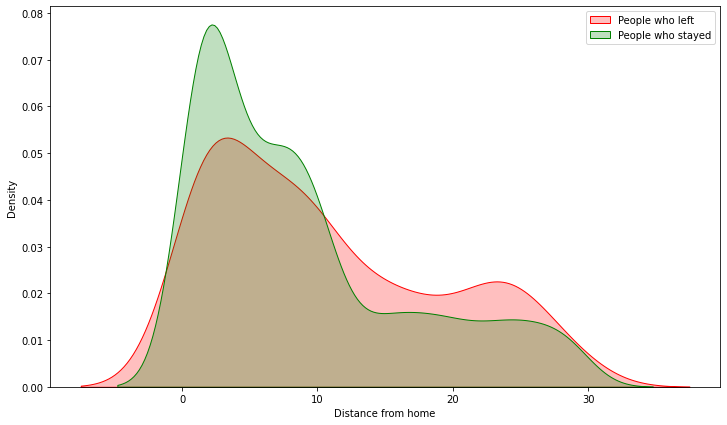

In [77]:
plt.figure(figsize = (12,7))

#left
sns.kdeplot(left['DistanceFromHome'], label = 'People who left', shade = True, color = 'r')

#stayed
sns.kdeplot(stayed['DistanceFromHome'], label = 'People who stayed', shade = True, color = 'g')

plt.legend()
plt.xlabel('Distance from home')

    **Observation**
    
There is clearly a relationship between distance from work and the employees who left/stayed. The farther you are from work, the more likely you are to leave the company (up to a certain point).

#### Years with Current Manager

Text(0.5, 0, 'Years with Current Manager')

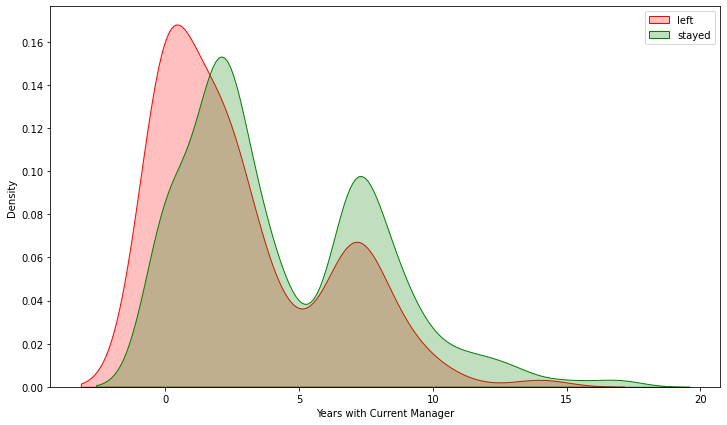

In [78]:
plt.figure(figsize=(12,7))

sns.kdeplot(left['YearsWithCurrManager'], label = 'left', shade = True, color = 'r')
sns.kdeplot(stayed['YearsWithCurrManager'], label = 'stayed', shade = True, color = 'g')

plt.legend()
plt.xlabel('Years with Current Manager')

    **Observation**
    
This graph underscores the importance of those first couple of years with a manager. Up to 3 years of working with one manager, the employee is more likely to leave the company. This could translate to ensuring that managers stay with their employees longer to prevent a departure. That could mean less internal transfers or less responsibility changes in the early years of an employee's tenure.

#### Total Working Years

Text(0.5, 0, 'Total Working Years')

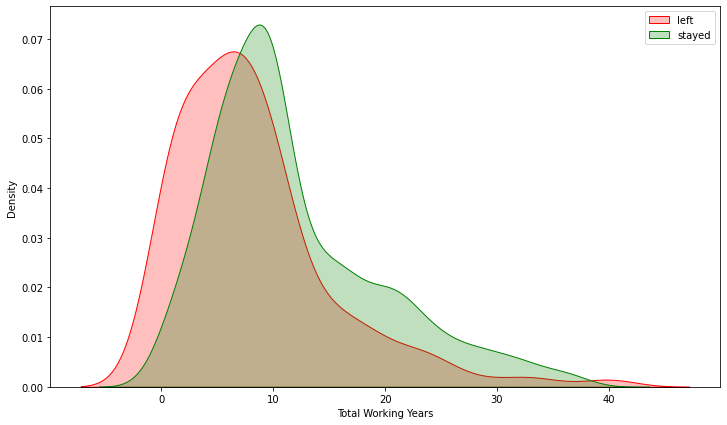

In [79]:
plt.figure(figsize=(12,7))

sns.kdeplot(left['TotalWorkingYears'], label = 'left', shade = True, color = 'r')
sns.kdeplot(stayed['TotalWorkingYears'], label = 'stayed', shade = True, color = 'g')

plt.legend()
plt.xlabel('Total Working Years')

    **Observation**
    
As expected, employees that have been working with the company for 7 years or less tend to leave more

#### Job Role v. Monthly Income

It is no secret that the job role probably influence what salary you get. Generically speaking, let's see which roles are getting paid the most since we noted above that pay does influence leaving/staying

<AxesSubplot:xlabel='MonthlyIncome', ylabel='JobRole'>

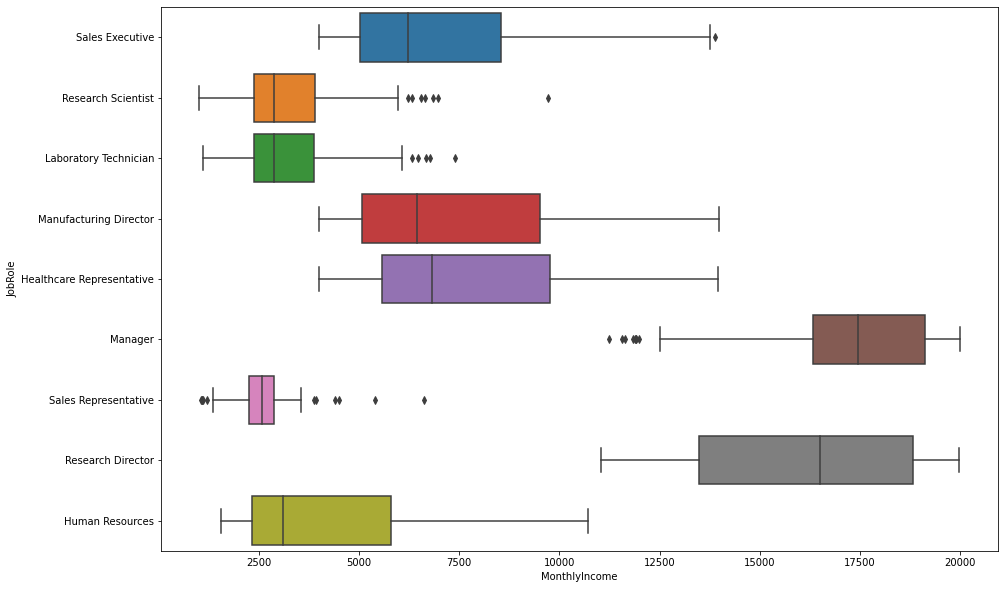

In [80]:
plt.figure(figsize = (15,10))
sns.boxplot(x = 'MonthlyIncome', y = 'JobRole', data = hr_df)

#### Gender v. Monthly Income

Pay equality is an important subject. Let's see if there are any disparities

<AxesSubplot:xlabel='MonthlyIncome', ylabel='Gender'>

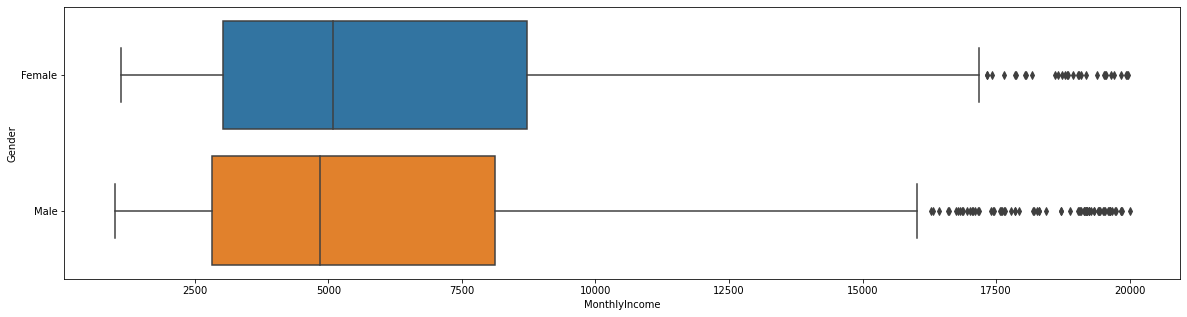

In [81]:
plt.figure(figsize = (20,5))
sns.boxplot(x = 'MonthlyIncome', y = 'Gender', data = hr_df)

    **Observation**
    
It does appear that the average is about equal, which is a great sign!

[Back to the top](#back_to_top)

<a id="clean"></a>
# Data Cleaning and Preprocessing

This section will focus on preparing the data for analysis. We have both categorical and numeric values. We'll address those here. In addition, we'll scale the data and assign our independent variable

In [82]:
#OneHotEncoder for dummy variables
#MinMaxScaler for scaling

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler 

In [83]:
# for review
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

<a id="cat"></a>
### Categorical Variables

We will assign dummy variables to the categorical attributes

In [84]:
cat_var = []

#For Loop to quickly find which are our categorical columns
for col in hr_df.columns:
    if hr_df[col].dtype == 'O':
        cat_var.append(col)
        
cat_df = hr_df[cat_var]
cat_df.head()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married


In [85]:
#dummy variables
encoter = OneHotEncoder() #initiate

cat_df = encoter.fit_transform(cat_df).toarray() #fit

cat_df = pd.DataFrame(cat_df) #make into a df to concat later

cat_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1467,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


<a id="num"></a>
### Numerical Variables

In [86]:
#identify which are numerical variables
num_var = []
for col in hr_df.columns:
    if col not in cat_var:
        num_var.append(col)
        
num_df = hr_df[num_var]
num_df.drop('Attrition', axis = 1, inplace = True) #this will be our dependent variable
num_df.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,2,4,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,3,61,2,2,2,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,92,2,1,3,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,4,56,3,1,3,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,1,40,3,1,2,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2


<a id="concat"></a>
### Concat dfs, Scaling, and Dependent Variable

In [87]:
#concat the categorical and numerical dataframes
df = pd.concat([num_df, cat_df], axis = 1)

#scaling (the independent variables)
scaler = MinMaxScaler()
x = scaler.fit_transform(df)

#The dependent variable
y = hr_df['Attrition']

/Users/carlozgil/opt/anaconda3/envs/tf/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/Users/carlozgil/opt/anaconda3/envs/tf/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


[Back to the top](#back_to_top)

<a id="analysis"></a>
# Data Analysis

We'll construct a few classification models and one deep learning model using tensorflow:
- Logistic Regression
- Randome Forest
- Artifical Neural Network

We'll evaluate those models using confusion matrix

<a id="log"></a>
## Logistic Regression

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix

In [89]:
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [90]:
# The Actual Model
model = LogisticRegression()
model.fit(X_train, y_train)

#prediction
y_pred = model.predict(X_test)

<a id="log_eval"></a>
### Logistic Regression Evaluation

In [91]:
print('********LOGISTIC REGRESSION*********\n')
print('Accuracy: ', accuracy_score(y_pred, y_test))
print('\n')
print('Confusion matrix: \n', str(confusion_matrix(y_pred, y_test)))
print('\n')
print('Classification report: \n', classification_report(y_test, y_pred))

********LOGISTIC REGRESSION*********

Accuracy:  0.8940217391304348


Confusion matrix: 
 [[306  35]
 [  4  23]]


Classification report: 
               precision    recall  f1-score   support

           0       0.90      0.99      0.94       310
           1       0.85      0.40      0.54        58

    accuracy                           0.89       368
   macro avg       0.87      0.69      0.74       368
weighted avg       0.89      0.89      0.88       368



<AxesSubplot:>

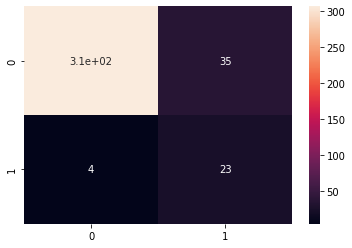

In [92]:
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot = True)

[Back to the top](#back_to_top)

<a id="forest"></a>
## Random Forest Classification

In [93]:
from sklearn.ensemble import RandomForestClassifier

In [94]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [95]:
y_pred = model.predict(X_test)

<a id="forest_eval"></a>
### Random Forest Evaluation

In [96]:
print('********RANDOM FOREST*********\n')
print('Accuracy: ', accuracy_score(y_pred, y_test))
print('\n')
print('Confusion matrix: \n', str(confusion_matrix(y_pred, y_test)))
print('\n')
print('Classification report: \n', classification_report(y_test, y_pred))

********RANDOM FOREST*********

Accuracy:  0.8614130434782609


Confusion matrix: 
 [[307  48]
 [  3  10]]


Classification report: 
               precision    recall  f1-score   support

           0       0.86      0.99      0.92       310
           1       0.77      0.17      0.28        58

    accuracy                           0.86       368
   macro avg       0.82      0.58      0.60       368
weighted avg       0.85      0.86      0.82       368



[[307   3]
 [ 48  10]]


/Users/carlozgil/opt/anaconda3/envs/tf/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


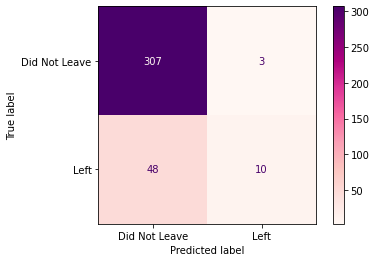

In [97]:
disp = plot_confusion_matrix(model, X_test, y_test,
                                 display_labels=['Did Not Leave','Left'],
                                 cmap=plt.cm.RdPu,
                                 normalize=None)
print(disp.confusion_matrix)

[Back to the top](#back_to_top)

<a id="deep"></a>
## Deep Learning Model - Artificial Neural Network

We will build this deep learning model sequentially

In [98]:
import tensorflow as tf

In [99]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=500, activation='relu', input_shape = (50, ))) #first layer
model.add(tf.keras.layers.Dense(units=500, activation='relu'))
model.add(tf.keras.layers.Dense(units=500, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid')) #sigmoid activation function

In [100]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 500)               25500     
_________________________________________________________________
dense_5 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_6 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 501       
Total params: 527,001
Trainable params: 527,001
Non-trainable params: 0
_________________________________________________________________


In [101]:
model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [102]:
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

epoch_hist = model.fit(X_train, y_train, epochs = 100, batch_size = 50)

#The prediction
y_pred = model.predict(X_test)
y_pred = (y_pred>0.5)

Train on 1102 samples
Epoch 1/100
1102/1102 [==============================] - 1s 866us/sample - loss: 0.4285 - accuracy: 0.8249
Epoch 2/100
1102/1102 [==============================] - 0s 290us/sample - loss: 0.3554 - accuracy: 0.8539
Epoch 3/100
1102/1102 [==============================] - 0s 280us/sample - loss: 0.3097 - accuracy: 0.8775
Epoch 4/100
1102/1102 [==============================] - 0s 304us/sample - loss: 0.2837 - accuracy: 0.8938
Epoch 5/100
1102/1102 [==============================] - 0s 262us/sample - loss: 0.2665 - accuracy: 0.8975
Epoch 6/100
1102/1102 [==============================] - 0s 267us/sample - loss: 0.2261 - accuracy: 0.9147
Epoch 7/100
1102/1102 [==============================] - 0s 259us/sample - loss: 0.1991 - accuracy: 0.9256
Epoch 8/100
1102/1102 [==============================] - 0s 255us/sample - loss: 0.1794 - accuracy: 0.9265
Epoch 9/100
1102/1102 [==============================] - 0s 257us/sample - loss: 0.1562 - accuracy: 0.9401
Epoch 10/100
11

<a id="deep_eval"></a>
### Artificial Neural Network Evaluation

#### Progress Lost During Training of the Artificial Neural Network Model

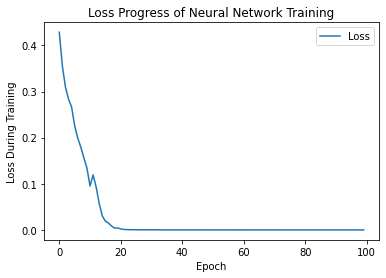

In [103]:
plt.plot(epoch_hist.history['loss'])
plt.title('Loss Progress of Neural Network Training')
plt.xlabel('Epoch')
plt.ylabel('Loss During Training')
plt.legend(['Loss'])

#### Model Accuracy During Training of the Artifical Neural Network Model

Note that the model started with approx 80% accuracy and then reached almost 100%

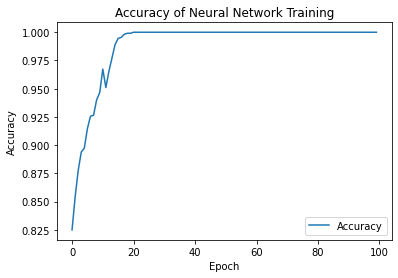

In [104]:
plt.plot(epoch_hist.history['accuracy'])
plt.title('Accuracy of Neural Network Training')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Accuracy'])

#### Confusion Matrix

Note that we were able to correctly classify almost 3000 samples

<AxesSubplot:>

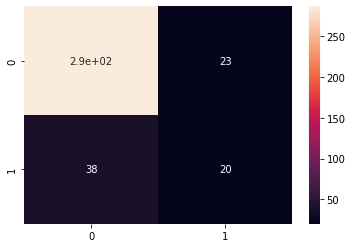

In [105]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

In [106]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90       310
           1       0.47      0.34      0.40        58

    accuracy                           0.83       368
   macro avg       0.67      0.64      0.65       368
weighted avg       0.82      0.83      0.82       368



Note that we were able to achieve around 80% accuracy

#### Things to Improve

All three models performed fairly well, but there are still some things we could do to improve. We could begin by optimizing the articial neural network. Another option would be to increase the number of samples. I personally think the dataset is slightly unbalanced, so this could be another tactics we use to improve results. 

Thank you.

[Back to the top](#back_to_top)